In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

/home/kelidan/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/kelidan/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.gaussian_process.kernels import *
from sklearn.gaussian_process import GaussianProcessRegressor
import shap

In [21]:
all_data = pd.read_csv('/home/kelidan/VVIRAL/Optimization campaigns/data_all.csv')

In [22]:
kernel = Sum(DotProduct(sigma_0=0.01, sigma_0_bounds=(1e-6, 1e6)), RationalQuadratic(alpha=0.01, length_scale=0.01,length_scale_bounds=(1e-6, 1e6))) + Matern(length_scale=0.1, nu=1.5,length_scale_bounds=(1e-6, 1e6))
#kernel = RationalQuadratic(alpha=0.01, length_scale=0.01,length_scale_bounds=(1e-2, 1e5))
kernel = Exponentiation(kernel, exponent=1)


In [23]:
def log_transform(x):
    return np.log1p(x)

In [24]:
X = all_data.drop(['Total Capsids', 'serotype', 'resin', 'from', 'Pure', 'Yield', 'SEC Area', 'Purity'], axis=1)
Y = all_data[['Total Capsids']].apply(log_transform)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [25]:
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50)
gaussian_process.fit(x_train, y_train)
mean_prediction, std_prediction = gaussian_process.predict(x_test, return_std=True)
# test_metrics_unscaled = get_metrics(y_test, mean_prediction)

  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 13.722222222222216, 'SHAP value (total capsids)')

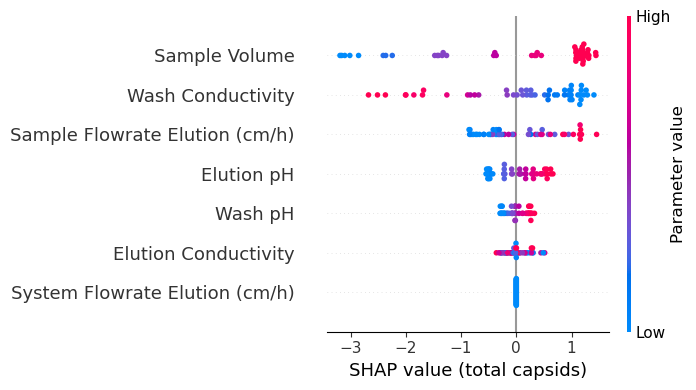

In [26]:
X_train_summary = shap.kmeans(x_train, 10)
ex = shap.KernelExplainer(gaussian_process.predict, X_train_summary)
shap_values = ex.shap_values(X)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial'] + plt.rcParams['font.sans-serif']
shap.summary_plot(shap_values[:,:10], X, max_display=7, plot_size=(7, 4), color_bar_label='Parameter value', show=False,)
plt.xlabel('SHAP value (total capsids)')
# plt.savefig("gih.png", dpi=700, bbox_inches='tight', transparent=True)

In [27]:
s_v = ex(X)



  0%|          | 0/50 [00:00<?, ?it/s]

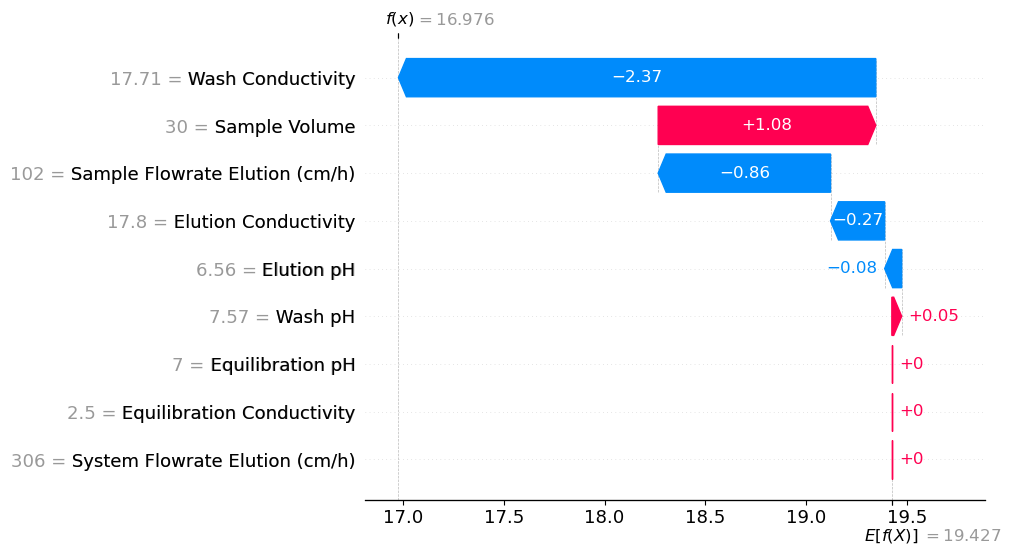

In [28]:
shap.plots.waterfall(s_v[1])

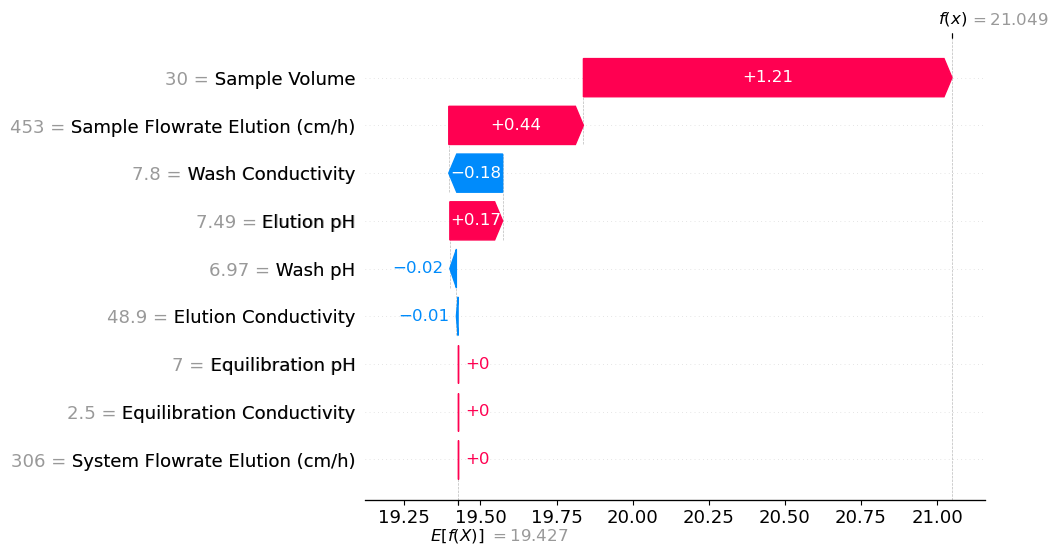

In [29]:
shap.plots.waterfall(s_v[25])

In [19]:
s_v.shape

(50, 10)